<a href="https://colab.research.google.com/github/kSahatova/ITMO_MLTech/blob/main/Lab2/MLTech_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from typing import Callable, Dict, Tuple, List
from random import choice

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f(x, y):
  z = 1/2 * (x-3)**2 + 2 * y**2 + x
  return z

In [3]:
arange = (-6, 6, 0.1)
x = np.arange(*arange)
y = np.arange(*arange)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

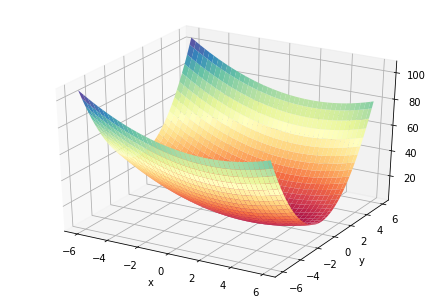

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap=cm.Spectral)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

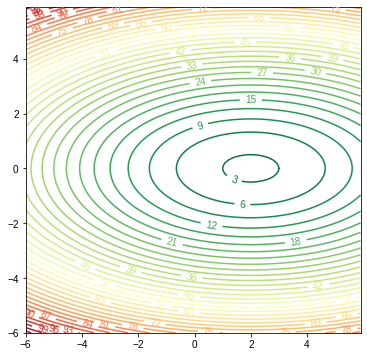

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.style.use('seaborn-whitegrid')
CS = ax.contour(X, Y, Z, levels=40, cmap='RdYlGn_r')
ax.clabel(CS, inline=True, fmt='%1d',  fontsize=10);

In [6]:
def plot_min(f: Callable, find_min_func: Callable, arange):
    coords_min, sequence = find_min_func
    f_min = f(coords_min['x'], coords_min['y'])
    print(f'Convergence took {len(sequence)-1} steps.')
    
    x = np.arange(*arange)
    y = np.arange(*arange)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.style.use('seaborn-whitegrid')
    CS = ax.contour(X, Y, Z, levels=30, cmap='RdYlGn_r')
    ax.clabel(CS, inline=True, fmt='%1d',  fontsize=10)
    
    ax.plot(sequence[:, 0], sequence[:, 1], 'g+', linestyle='dashed', markersize=10)
    ax.plot(coords_min['x'], coords_min['y'], 'kx', markersize=20)

    
    ax.set_xlim(arange[0], arange[1])
    ax.set_ylim(arange[0], arange[1])
    
    return fig, ax

In [7]:
def find_min_SGD(f: Callable, Df_d: Dict[str, Callable], coords: Dict[str, float], 
                 max_iter: int = 10000, delta: float = 10e-6, 
                 lr: float = 0.01):
    components = list(Df_d.keys())
    
    step = 0
    step_size = 1
    sequence = [list(coords.values())]
    
    while step < max_iter and abs(step_size) > delta:
        rand_component = choice(components)
        g = Df_d[rand_component](coords[rand_component])
        
        step_size = lr * g
        coords[rand_component] -= step_size
        
        sequence.append(list(coords.values()))
        step += 1
    
    return coords, np.array(sequence)

In [8]:
def find_min_Adam(f: Callable, Df_d: Dict[str, Callable], coords: Dict[str, float], 
                  max_iter: int = 10000, delta: float = 10e-6, lr: float = 0.001,
                  betta_1: float = 0.9, betta_2: float = 0.999, 
                  eps: float = 10e-8):    
    components = list(Df_d.keys())

    step = 0
    step_size = {key: 1 for key in Df_d.keys()}
    sequence = [list(coords.values())]

    momentum = 0
    velocity = 0

    while step < max_iter and abs(sum(step_size.values())) > delta:
        for component in coords:
            g = Df_d[component](coords[component])
            momentum = (betta_1 * momentum) + ((1 - betta_1) * g) 
            velocity = (betta_2 * velocity) + ((1 - betta_2) * (g ** 2)) 

            momentum_hat = momentum / (1 - betta_1)
            velocity_hat = velocity / (1 - betta_2)

            step_size[component] = (lr * momentum_hat) / (np.sqrt(velocity_hat) + eps)
            coords[component] -= step_size[component]

        sequence.append(list(coords.values()))
        step += 1

    return coords, np.array(sequence)

In [20]:
d_params = {
    'x': lambda x: (x - 3) + 1,
    'y': lambda y: 4 * y
}
init_coords = {'x': 1, 'y': -1}

In [21]:
coords_min, sequence = find_min_SGD(f, d_params, init_coords.copy())
f_min = f(coords_min['x'], coords_min['y'])
coords_min = {key: round(value, 2) for key, value in coords_min.items()}
print(f'SGD  | Minimum found value of function f is {coords_min}, f({coords_min}) = {f_min:.2f}')

SGD  | Minimum found value of function f is {'x': 1.86, 'y': -0.0}, f({'x': 1.86, 'y': -0.0}) = 2.51


Convergence took 420 steps.


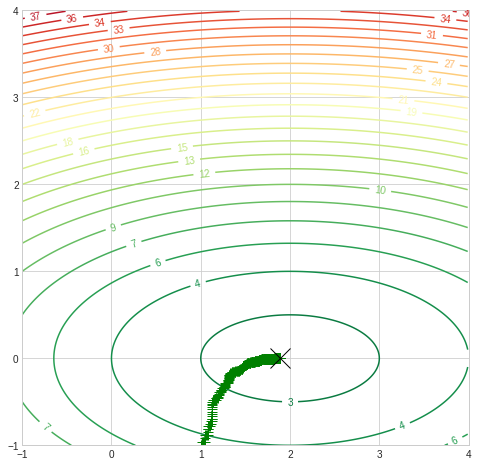

In [22]:
arange= (-1, 4, 0.01)
plot_min(f, find_min_SGD(f, d_params, init_coords.copy()), arange);

In [23]:
coords_min, sequence = find_min_Adam(f, d_params, init_coords.copy())
f_min = f(coords_min['x'], coords_min['y'])
coords_min = {key: round(value, 2) for key, value in coords_min.items()}
print(f'SGD  | Minimum found value of function f is {coords_min}, f({coords_min}) = {f_min:.2f}')

SGD  | Minimum found value of function f is {'x': 1.96, 'y': 0.01}, f({'x': 1.96, 'y': 0.01}) = 2.50


Convergence took 5217 steps.


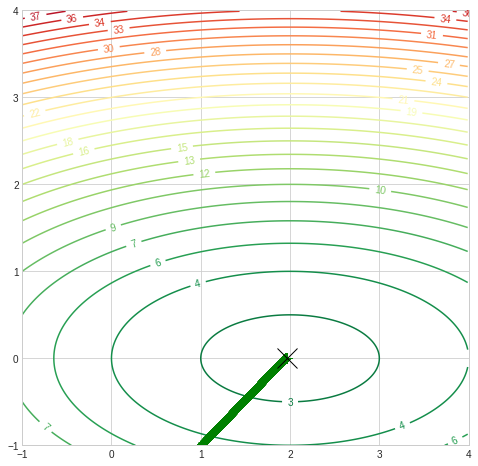

In [24]:
plot_min(f, find_min_Adam(f, d_params, init_coords.copy()), arange);